## Machine Learning 

__finding pattern in given past data, and on the basis of that prediction future patterns is known as machine learning__

## SuperVised Machine Learning


 when we have input features with labels (outcomes) and want to find some logic by which we can detect labels out of eatures is known as `SuperVised Machine Learning`

### Regression

predicting the value of a dependent variable on the basis of independent variable 

let's take an example of prediction weight using height 

### Step1 - collect, orgranise, visualize and summerize the data you have

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-whitegrid')

In [3]:
height = np.random.normal(140, 20, 300)

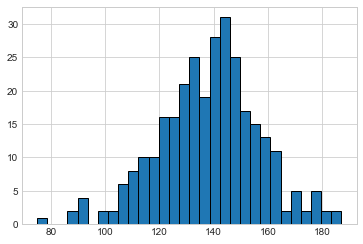

In [4]:
plt.hist(height, bins=30, ec='k')
plt.show()

In [5]:
weight = np.random.normal(70, 20, 300)

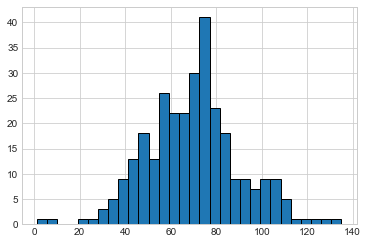

In [6]:
plt.hist(weight, bins=30, ec='k')
plt.show()

In [7]:
np.corrcoef(height, weight) # -1, 1 , closer to 0 means no relation b/w features
# if value is postive and closed to 1 it means highly related features in positive direction (if we increase 1 unit of a variable it will reflect as increment in var2)
# if value is negative and closed to -1 it means highly related features in negative direction (if we increase 1 unit of var1 will reflect as decrement t in var2)


array([[1.        , 0.10949894],
       [0.10949894, 1.        ]])

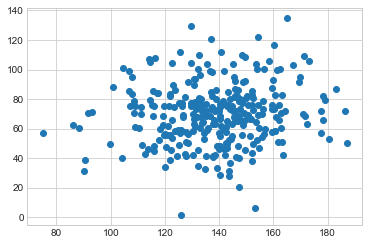

In [8]:
plt.scatter(height, weight)
plt.show()

eq of line is y = mx + c

m = 0.5 

c = around 10 approx

In [9]:
height = np.random.normal(140, 20, 300)

In [25]:
weight = 0.5 * height + np.random.normal(10, 5, 300)

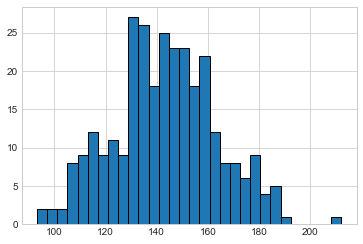

In [26]:
plt.hist(height, bins=30, ec='k')
plt.show()

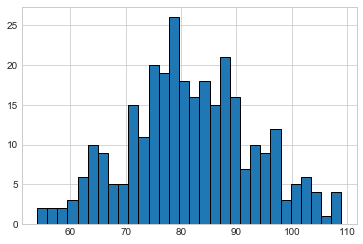

In [27]:
plt.hist(weight, bins=30, ec='k')
plt.show()

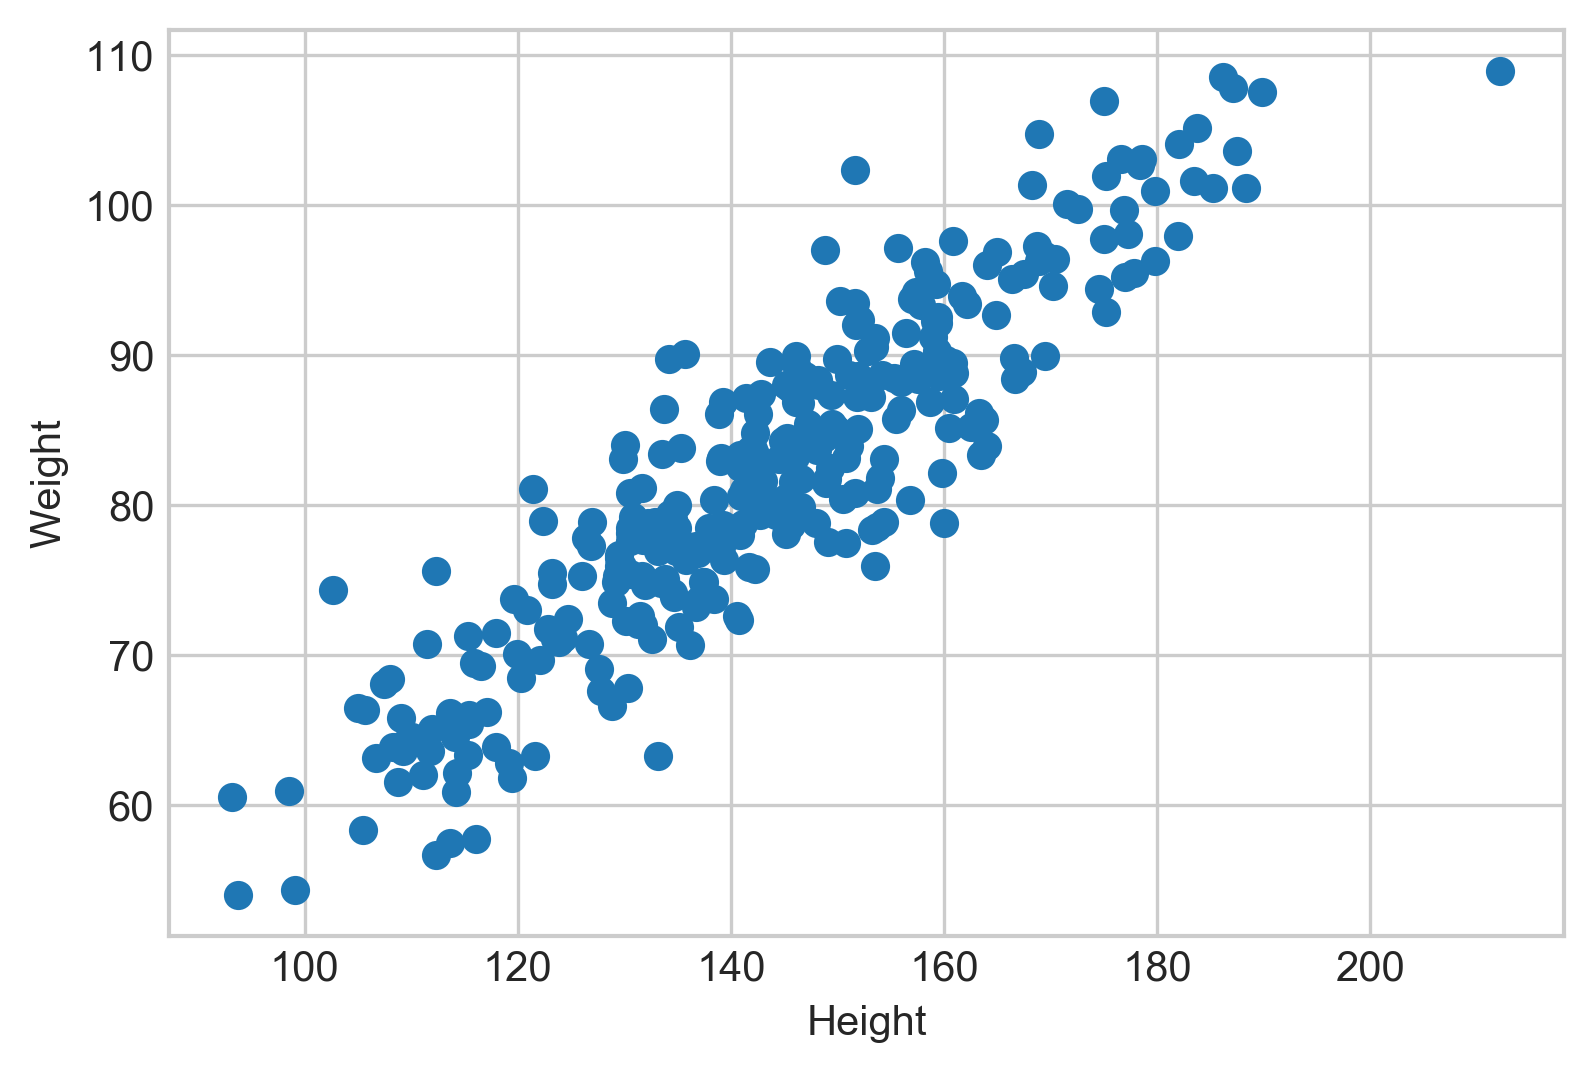

In [29]:
plt.figure(dpi=300)
plt.scatter(height, weight)
plt.xlabel('Height')
plt.ylabel("Weight")
plt.show()

In [30]:
x = np.linspace(-5, 5, 100)

In [31]:
y = 2 * x **2 + 3 * x + 10 

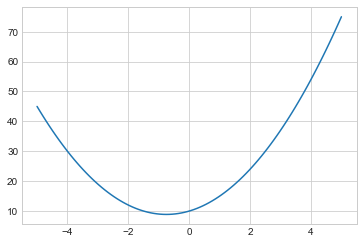

In [33]:
plt.plot(x, y)
plt.show()

$$ \hat y = \beta_0 + \beta_1 X $$

$$ MSE = \frac {\sum\limits_{i=1}^N \quad {(y_i - \bar y_i)^2} } {N} $$

$$ \hat \beta_1 = \frac {\sum\limits_{i=1}^N  \quad (x_i-\bar x)\quad(y_i - \bar y)} { {\sum\limits_{i=1}^N  \quad (x_i - \bar x_i)}^2 }  $$

$$\beta_0 = \hat y - \beta_1 \bar X$$

`Latex`

In [37]:
x = height
y = weight 
x_bar = x.mean()
y_bar = y.mean()
x_xbar = x - x_bar
y_ybar = y - y_bar

In [38]:
beta_1 = (x_xbar * y_ybar).sum() / (x_xbar**2).sum()

In [39]:
beta_1

0.5063709550895996

In [40]:
beta_0 = y_bar - beta_1 * x_bar

In [41]:
beta_0

9.311805680144374

In [42]:
y_pred = beta_0 + beta_1 * x

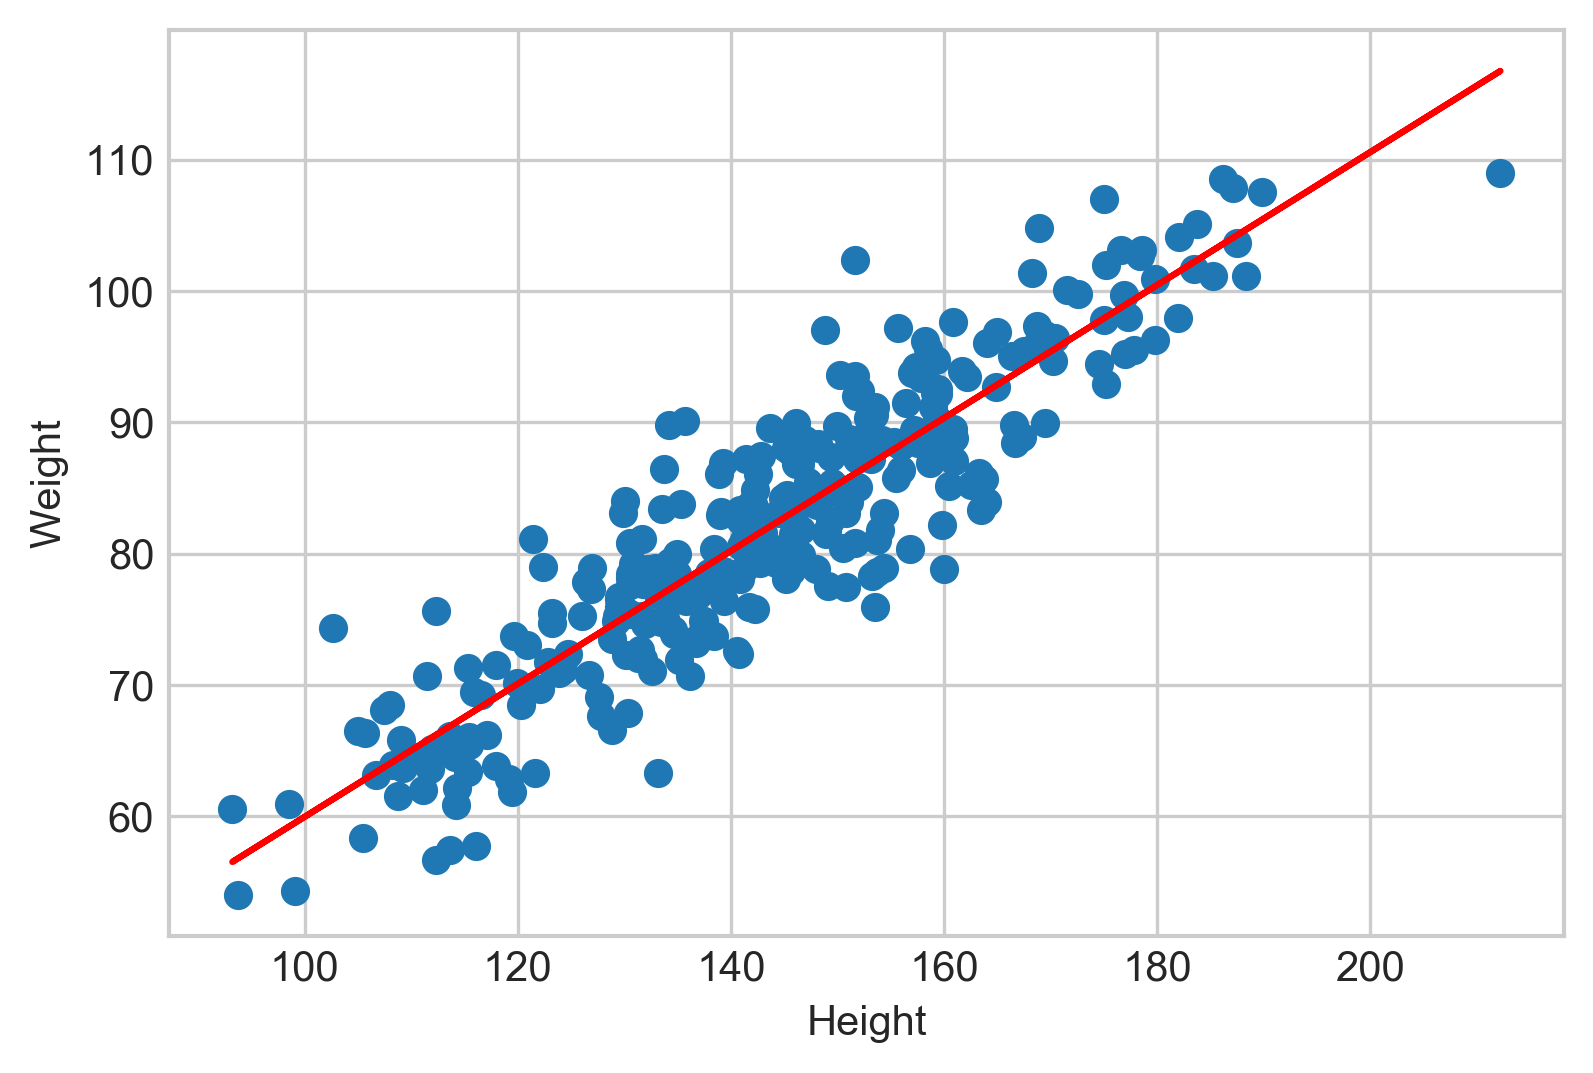

In [43]:
plt.figure(dpi=300)
plt.scatter(height, weight)
plt.plot(height, y_pred, 'r')
plt.xlabel('Height')
plt.ylabel("Weight")
plt.show()

In [44]:
new_heights = [ 120, 135, 200, 100 ]

In [45]:
new_weight = []

for h in new_heights:
    w = beta_0 + beta_1 * h
    new_weight.append(w)

In [46]:
new_weight

[70.07632029089632, 77.67188461724032, 110.58599669806429, 59.94890118910433]

## `Linear Regression`

### `Multiple Linear Regression`

`sci-kit learn`

In [47]:
from sklearn.datasets import load_boston

In [49]:
housing = load_boston()

In [50]:
print(type(housing))

<class 'sklearn.utils.Bunch'>


In [53]:
housing['data'].shape

(506, 13)

506 - observation
13 - features

In [54]:
housing['feature_names']

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

__Domain Knowledge__

In [56]:
housing['target'].shape
#price

(506,)

In [57]:
print(housing['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [60]:
X = pd.DataFrame(housing['data'],
                 columns=housing['feature_names'])

In [61]:
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [62]:
y = pd.Series(housing['target'], name = 'Price')

In [63]:
y.head()

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: Price, dtype: float64

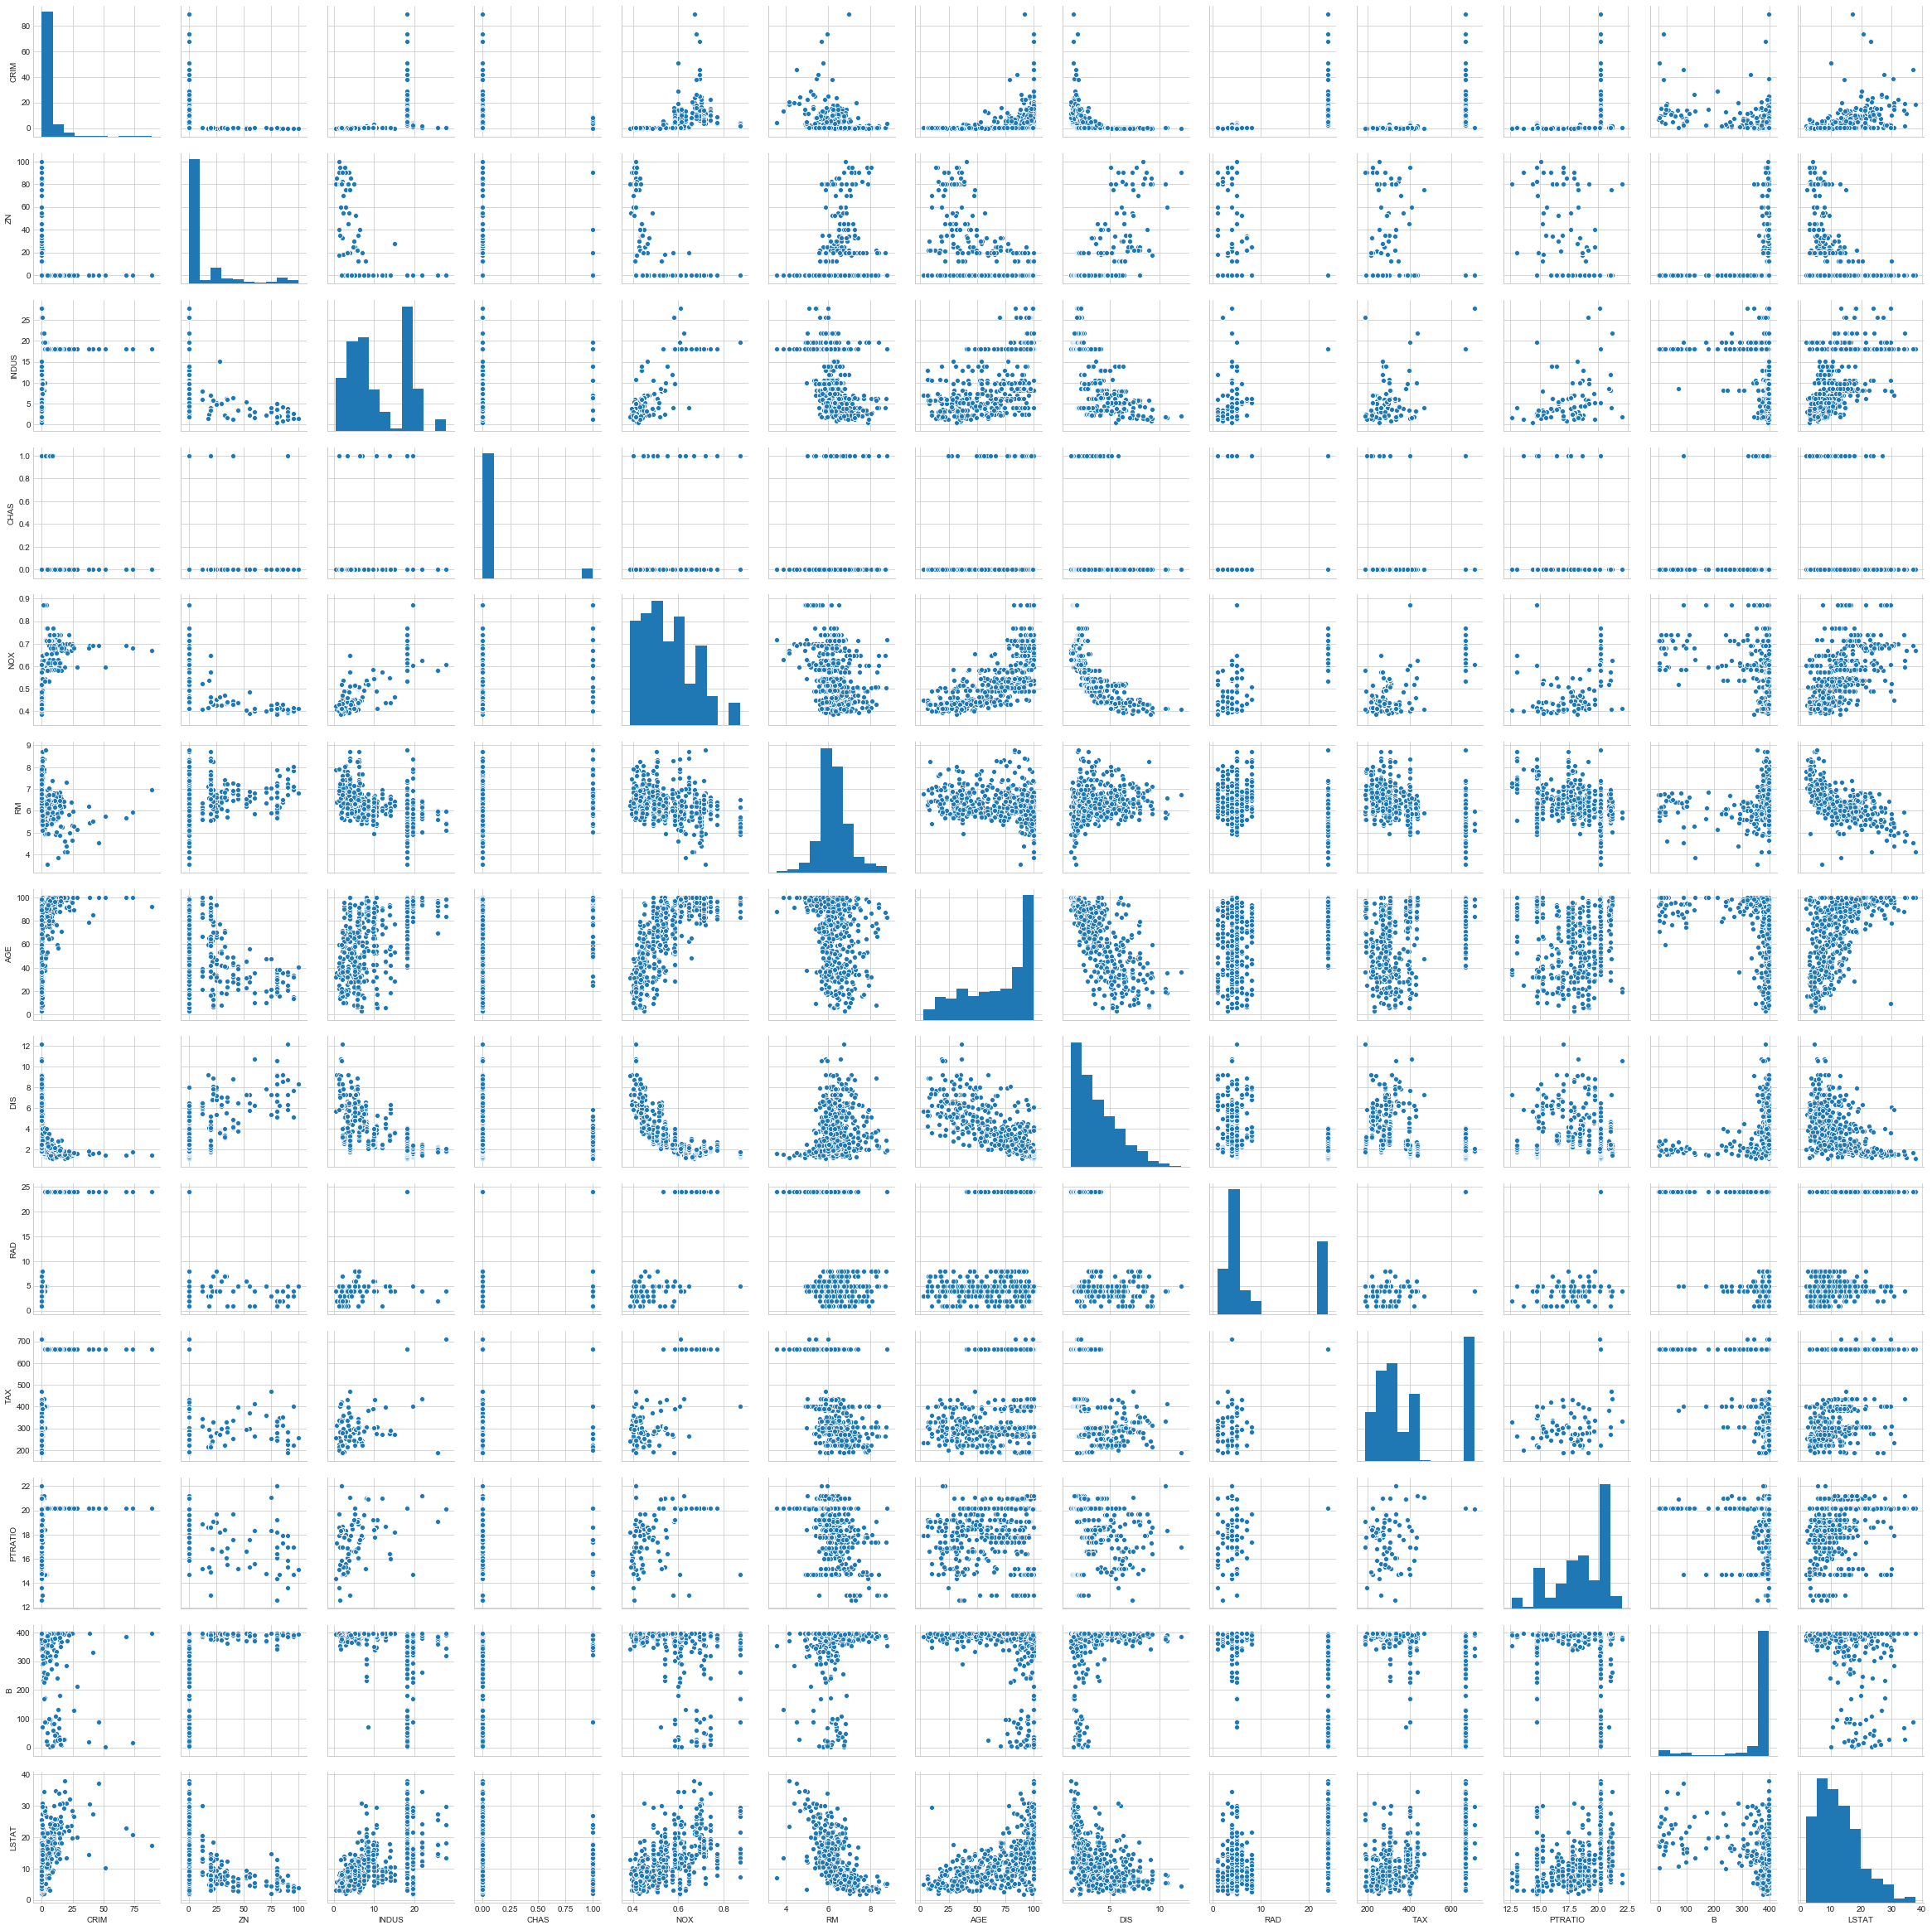

In [64]:
sns.pairplot(X)
plt.show()

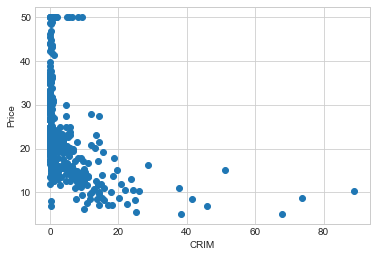

Corelation Coef:  -0.3883046085868114


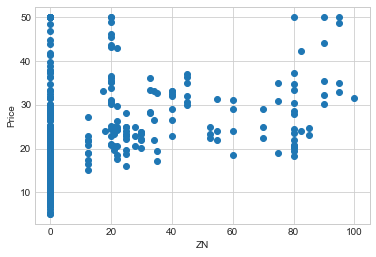

Corelation Coef:  0.3604453424505433


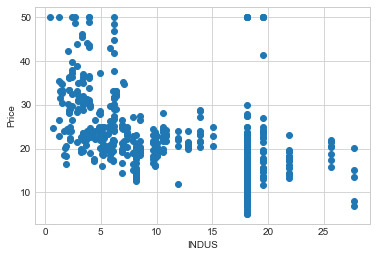

Corelation Coef:  -0.4837251600283728


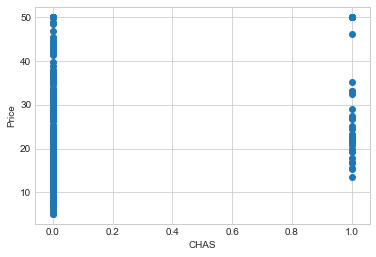

Corelation Coef:  0.17526017719029818


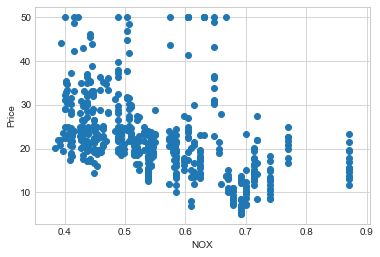

Corelation Coef:  -0.4273207723732824


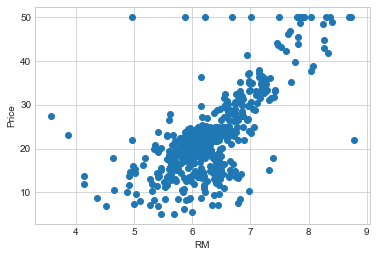

Corelation Coef:  0.695359947071539


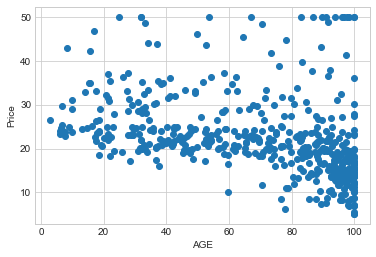

Corelation Coef:  -0.37695456500459606


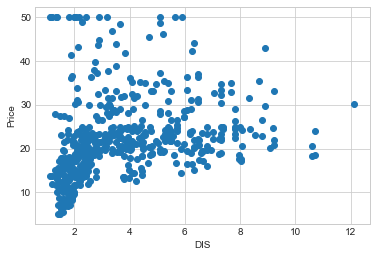

Corelation Coef:  0.24992873408590388


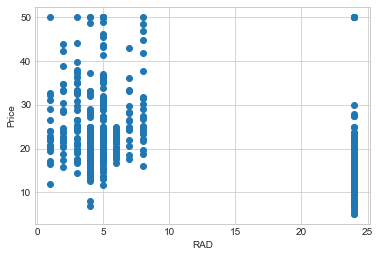

Corelation Coef:  -0.38162623063977746


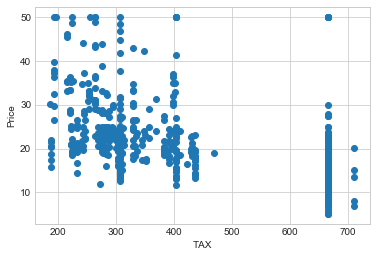

Corelation Coef:  -0.46853593356776696


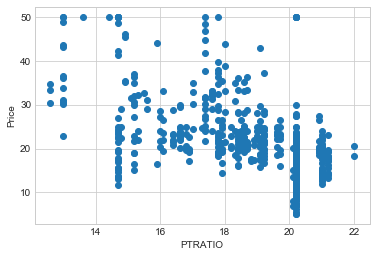

Corelation Coef:  -0.5077866855375615


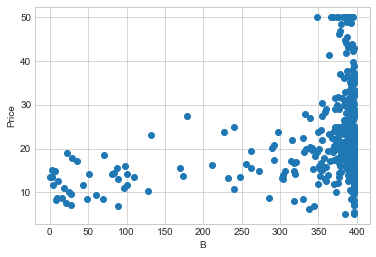

Corelation Coef:  0.33346081965706637


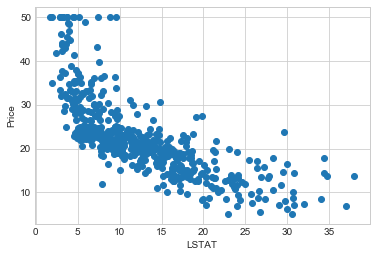

Corelation Coef:  -0.7376627261740148


In [68]:
for col in X.columns:
    plt.scatter(X[col], y)
    plt.xlabel(col)
    plt.ylabel("Price")
    plt.show()
    print("Corelation Coef: ",np.corrcoef(X[col], y)[0, 1])

In [70]:
X.drop('ZN', axis=1, inplace=True)

evaluation matrices 

    Error -> MSE
    accuracy -> R2 score

__step 3__ split data into training and testing part

In [71]:
from sklearn.model_selection import train_test_split

In [95]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                test_size=0.2, 
                                                   )

In [96]:
X_train.head()

,CRIM,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
257,0.61154,3.97,0.0,0.647,8.704,86.9,1.8010,5.0,264.0,13.0,389.70,5.12
392,11.57790,18.10,0.0,0.700,5.036,97.0,1.7700,24.0,666.0,20.2,396.90,25.68
483,2.81838,18.10,0.0,0.532,5.762,40.3,4.0983,24.0,666.0,20.2,392.92,10.42
381,15.87440,18.10,0.0,0.671,6.545,99.1,1.5192,24.0,666.0,20.2,396.90,21.08
476,4.87141,18.10,0.0,0.614,6.484,93.6,2.3053,24.0,666.0,20.2,396.21,18.68


In [97]:
y_train.head()

257    50.0
392     9.7
483    21.8
381    10.9
476    16.7
Name: Price, dtype: float64

In [98]:
X_test.head()

,CRIM,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
387,22.59710,18.10,0.0,0.700,5.000,89.5,1.5184,24.0,666.0,20.2,396.90,31.99
48,0.25387,6.91,0.0,0.448,5.399,95.3,5.8700,3.0,233.0,17.9,396.90,30.81
69,0.12816,6.07,0.0,0.409,5.885,33.0,6.4980,4.0,345.0,18.9,396.90,8.79
433,5.58107,18.10,0.0,0.713,6.436,87.9,2.3158,24.0,666.0,20.2,100.19,16.22
320,0.16760,7.38,0.0,0.493,6.426,52.3,4.5404,5.0,287.0,19.6,396.90,7.20


In [99]:
y_test.head()

387     7.4
48     14.4
69     20.9
433    14.3
320    23.8
Name: Price, dtype: float64

In [100]:
X.shape

(506, 12)

In [101]:
X_train.shape

(404, 12)

In [102]:
X_test.shape

(102, 12)

__step 4__ model selection

In [103]:
from sklearn.linear_model import LinearRegression

In [104]:
model = LinearRegression()

In [105]:
model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

__step 5__ learning or fitting or training of our model 

In [106]:
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [107]:
model.coef_ # beta_1, beta_2, beta_3, beta_4 ..... beta_12

array([-9.84380951e-02,  7.80083147e-03,  2.27360727e+00, -1.77310701e+01,
        3.65572678e+00,  6.45107295e-03, -1.10232966e+00,  3.43829385e-01,
       -1.21878389e-02, -1.08196259e+00,  9.24072475e-03, -6.01467606e-01])

In [108]:
model.intercept_ # beta_0

39.153407210206296

__step 5__ Model Evalution 

In [109]:
from sklearn.metrics import r2_score, mean_squared_error

In [110]:
y_pred = model.predict(X_test)

In [111]:
y_pred[:5]

array([ 4.54652035,  9.08120008, 21.60219763, 17.094675  , 25.6289826 ])

In [112]:
y_test[:5]

387     7.4
48     14.4
69     20.9
433    14.3
320    23.8
Name: Price, dtype: float64

In [113]:
mse = mean_squared_error(y_test, y_pred)
print("Squared Error: ", mse)
print("Acutal Error: ", np.sqrt(mse))
print(f"Accuracy : {r2_score(y_test, y_pred)*100:.2f}")

Squared Error:  20.16002315082997
Acutal Error:  4.48999144217781
Accuracy : 74.45


In [117]:
new_data = X_test[:2]

In [118]:
model.predict(new_data)

array([4.54652035, 9.08120008])

In [119]:
mpg = sns.load_dataset('mpg')

## your assignment 

In [120]:
mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


    create an tkinter application which take input as displacement,  horsepower, weight and predict mileage of a car using linear regression on mpg dataset 